# 2 geopandas 0.10版本重要新特性一览

## 2.1 新增空间最近连接方法sjoin_nearest()

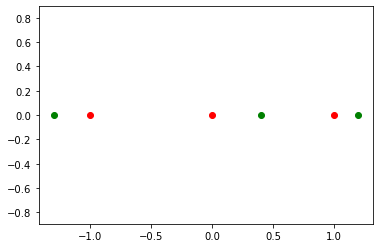

In [1]:
import geopandas as gpd
from shapely.geometry import Point

# 构造示例点要素表1
gdf1 = gpd.GeoDataFrame(
    {
        'id1': list('abc'),
        'geometry': [
            Point(0, 0),
            Point(1, 0),
            Point(-1, 0)
        ]
    }
)

# 构造示例点要素表2
gdf2 = gpd.GeoDataFrame(
    {
        'id2': list('def'),
        'geometry': [
            Point(0.4, 0),
            Point(1.2, 0),
            Point(-1.3, 0)
        ]
    }
)

ax = gdf1.plot(color='red')
ax = gdf2.plot(color='green', ax=ax)
ax.axis('equal');

In [2]:
(
    gpd
    .sjoin_nearest(gdf1, gdf2, max_distance=0.35, distance_col='对应距离')
)

,id1,geometry,index_right,id2,对应距离
1,b,POINT (1.00000 0.00000),1,e,0.2
2,c,POINT (-1.00000 0.00000),2,f,0.3


## 2.2 新增交互地图式数据探索方法explore()

In [3]:
provinces = gpd.read_file('省.shp')
provinces.head(3)

,省代码,省,类型,geometry
0,110000,北京市,直辖市,"POLYGON ((116.67527 41.04010, 116.67616 41.040..."
1,120000,天津市,直辖市,"POLYGON ((117.44383 40.25101, 117.45611 40.246..."
2,130000,河北省,省,"MULTIPOLYGON (((118.85390 39.10692, 118.84934 ..."


In [4]:
provinces.explore(
    column='类型', 
    zoom_start=4
)

## 2.3 sjoin()、sjoin_nearest()、overlay()和clip()亦可作为GeoDataFrame的方法来使用

In [5]:
(
    gdf1
    .sjoin_nearest(gdf2, 
                   max_distance=0.35, 
                   distance_col='对应距离')
)

,id1,geometry,index_right,id2,对应距离
1,b,POINT (1.00000 0.00000),1,e,0.2
2,c,POINT (-1.00000 0.00000),2,f,0.3


## 2.4 GeoSeries新增批量XY转点方法from_xy()

In [6]:
gpd.points_from_xy(x=range(10), y=range(10))

<GeometryArray>
Length: 10, dtype: geometry

In [7]:
gpd.GeoSeries.from_xy(x=range(10), y=range(10))

0    POINT (0.00000 0.00000)
1    POINT (1.00000 1.00000)
2    POINT (2.00000 2.00000)
3    POINT (3.00000 3.00000)
4    POINT (4.00000 4.00000)
5    POINT (5.00000 5.00000)
6    POINT (6.00000 6.00000)
7    POINT (7.00000 7.00000)
8    POINT (8.00000 8.00000)
9    POINT (9.00000 9.00000)
dtype: geometry

## 2.5 to_file()方法在driver参数缺省时可自动识别导出文件类型

In [8]:
import os

gdf1.to_file('test.shp')

gdf1.to_file('test.geojson')

[file for file in os.listdir() if 'test.' in file]

['test.cpg', 'test.dbf', 'test.geojson', 'test.shp', 'test.shx']

## 2.6 支持对矢量数据自动推断合适的横轴墨卡托坐标参考系

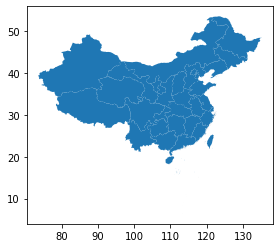

In [9]:
provinces.plot();

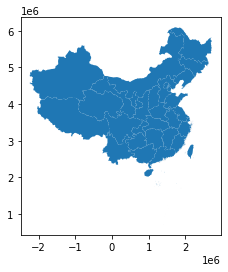

In [10]:
provinces.to_crs(provinces.estimate_utm_crs()).plot();

## 2.7 sjoin()中的op参数改名为predicate

In [11]:
gdf1.sjoin(gdf2, op='contains')

C:\Conda\envs\data-science\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id1,geometry,index_right,id2
